In [1]:
import os
import pandas as pd
import numpy as np
from itertools import combinations

In [2]:
csv_files = sorted([file for file in os.listdir('GadgetX-NewMDCLUSTER-1/combined-csv/') if file.endswith('.csv')])

In [3]:
# Calculate features for halo pairs
def calculate_features_for_pairs(pairs, df, merge_status):
    mass1 = []
    mass2 = []
    relative_positions = []
    relative_velocities = []
    will_merge = []
    numSubStruct1 = []
    numSubStruct2 = []
    sigV1 = []
    sigV2 = []
    lambda1 = []
    lambda2 = []
    cNFW1 = []
    cNFW2 = []
    Ekin1 = []
    Ekin2 = []
    Epot1 = []
    Epot2 = []
    ovdens1 = []
    ovdens2 = []
    ordered_pairs = []

    for pair in pairs:
        halo1 = df.loc[pair[0]]
        halo2 = df.loc[pair[1]]
        
        # Ensure that the halo with a larger mass is the first in the pair
        if halo1['Mvir'] < halo2['Mvir']:
            halo1, halo2 = halo2, halo1
            pair = (pair[1], pair[0])

        # Calculate the relative position and velocity
        position1 = np.array([halo1['Xc'], halo1['Yc'], halo1['Zc']])
        position2 = np.array([halo2['Xc'], halo2['Yc'], halo2['Zc']])
        velocity1 = np.array([halo1['VXc'], halo1['VYc'], halo1['VZc']])
        velocity2 = np.array([halo2['VXc'], halo2['VYc'], halo2['VZc']])

        relative_position = np.linalg.norm(position1 - position2)
        relative_velocity = np.linalg.norm(velocity1 - velocity2)

        # Store the features
        mass1.append(halo1['Mvir'])
        mass2.append(halo2['Mvir'])
        relative_positions.append(relative_position)
        relative_velocities.append(relative_velocity)
        will_merge.append(merge_status)
        numSubStruct1.append(halo1['numSubStruct'])
        numSubStruct2.append(halo2['numSubStruct'])
        sigV1.append(halo1['sigV'])
        sigV2.append(halo2['sigV'])
        lambda1.append(halo1['lambda'])
        lambda2.append(halo2['lambda'])
        cNFW1.append(halo1['cNFW'])
        cNFW2.append(halo2['cNFW'])
        Ekin1.append(halo1['Ekin'])
        Ekin2.append(halo2['Ekin'])
        Epot1.append(halo1['Epot'])
        Epot2.append(halo2['Epot'])
        ovdens1.append(halo1['ovdens'])
        ovdens2.append(halo2['ovdens'])
        ordered_pairs.append(pair)
        
    return mass1, mass2, relative_positions, relative_velocities, will_merge, numSubStruct1, numSubStruct2, sigV1, sigV2, lambda1, lambda2, cNFW1, cNFW2, Ekin1, Ekin2, Epot1, Epot2, ovdens1, ovdens2, ordered_pairs

In [4]:
# Initialize lists to store the features of the pairs
pairs = []
mass1 = []
mass2 = []
relative_positions = []
relative_velocities = []
will_merge = []
numSubStruct1 = []
numSubStruct2 = []
sigV1 = []
sigV2 = []
lambda1 = []
lambda2 = []
cNFW1 = []
cNFW2 = []
Ekin1 = []
Ekin2 = []
Epot1 = []
Epot2 = []
ovdens1 = []
ovdens2 = []


# Loop over the snapshots in pairs
for i in range(len(csv_files) - 1):
    # Load the dataframes for the current and next snapshot
    df_current_snapshot = pd.read_csv(f'GadgetX-NewMDCLUSTER-1/combined-csv/{csv_files[i]}')
    df_next_snapshot = pd.read_csv(f'GadgetX-NewMDCLUSTER-1/combined-csv/{csv_files[i + 1]}')

    # Set 'ID' as index for faster lookup
    df_current_snapshot.set_index('ID', inplace=True)

    # Get the pairs of progenitors that merged in the next snapshot
    merging_pairs = []
    for _, row in df_next_snapshot.iterrows():
        current_pairs = list(combinations(eval(row['ProgenitorsID']), 2))
        merging_pairs.extend([pair for pair in current_pairs if pair[0] in df_current_snapshot.index and pair[1] in df_current_snapshot.index])

    # Calculate the features for merging pairs in the current snapshot and store them
    mass1_merging, mass2_merging, relative_positions_merging, relative_velocities_merging, will_merge_merging, \
        numSubStruct1_merging, numSubStruct2_merging, sigV1_merging, sigV2_merging, lambda1_merging, lambda2_merging, \
            cNFW1_merging, cNFW2_merging, Ekin1_merging, Ekin2_merging, Epot1_merging, Epot2_merging, ovdens1_merging, ovdens2_merging, ordered_pairs_merging \
                = calculate_features_for_pairs(merging_pairs, df_current_snapshot, 1)

    # Store the features
    pairs.extend(ordered_pairs_merging)
    mass1.extend(mass1_merging)
    mass2.extend(mass2_merging)
    relative_positions.extend(relative_positions_merging)
    relative_velocities.extend(relative_velocities_merging)
    will_merge.extend(will_merge_merging)
    numSubStruct1.extend(numSubStruct1_merging)
    numSubStruct2.extend(numSubStruct2_merging)
    sigV1.extend(sigV1_merging)
    sigV2.extend(sigV2_merging)
    lambda1.extend(lambda1_merging)
    lambda2.extend(lambda2_merging)
    cNFW1.extend(cNFW1_merging)
    cNFW2.extend(cNFW2_merging)
    Ekin1.extend(Ekin1_merging)
    Ekin2.extend(Ekin2_merging)
    Epot1.extend(Epot1_merging)
    Epot2.extend(Epot2_merging)
    ovdens1.extend(ovdens1_merging)
    ovdens2.extend(ovdens2_merging)

    # Number of merging pairs in the dataset
    num_merging_pairs = len(merging_pairs)

    # All halo IDs in the current snapshot
    all_halo_ids = set(df_current_snapshot.index)

    # Progenitor halo IDs in the next snapshot
    progenitor_halo_ids = set()
    for progenitors in df_next_snapshot['ProgenitorsID']:
        progenitor_halo_ids.update(eval(progenitors))

    # Halo IDs that are not progenitors
    non_progenitor_halo_ids = list(all_halo_ids - progenitor_halo_ids)
    np.random.shuffle(non_progenitor_halo_ids)

    # Select pairs of non-progenitor halos
    non_progenitor_pairs = list(combinations(non_progenitor_halo_ids[:num_merging_pairs*2], 2))[:num_merging_pairs]

    # Calculate the features for non-merging pairs in the current snapshot and store them
    mass1_non_merging, mass2_non_merging, relative_positions_non_merging, relative_velocities_non_merging, will_merge_non_merging, \
        numSubStruct1_non_merging, numSubStruct2_non_merging, sigV1_non_merging, sigV2_non_merging, lambda1_non_merging, lambda2_non_merging, \
            cNFW1_non_merging, cNFW2_non_merging, Ekin1_non_merging, Ekin2_non_merging, Epot1_non_merging, Epot2_non_merging, ovdens1_non_merging, ovdens2_non_merging, ordered_pairs_non_merging \
                = calculate_features_for_pairs(non_progenitor_pairs, df_current_snapshot, 0)

    # Store the features
    pairs.extend(ordered_pairs_non_merging)
    mass1.extend(mass1_non_merging)
    mass2.extend(mass2_non_merging)
    relative_positions.extend(relative_positions_non_merging)
    relative_velocities.extend(relative_velocities_non_merging)
    will_merge.extend(will_merge_non_merging)
    numSubStruct1.extend(numSubStruct1_non_merging)
    numSubStruct2.extend(numSubStruct2_non_merging)
    sigV1.extend(sigV1_non_merging)
    sigV2.extend(sigV2_non_merging)
    lambda1.extend(lambda1_non_merging)
    lambda2.extend(lambda2_non_merging)
    cNFW1.extend(cNFW1_non_merging)
    cNFW2.extend(cNFW2_non_merging)
    Ekin1.extend(Ekin1_non_merging)
    Ekin2.extend(Ekin2_non_merging)
    Epot1.extend(Epot1_non_merging)
    Epot2.extend(Epot2_non_merging)
    ovdens1.extend(ovdens1_non_merging)
    ovdens2.extend(ovdens2_non_merging)

# Create a DataFrame for pairs
pairs_df = pd.DataFrame({
    'pair': pairs,
    'will_merge': will_merge,
    'relative_position': relative_positions,
    'relative_velocity': relative_velocities,
    'mass1': mass1,
    'mass2': mass2,
    'numSubStruct1': numSubStruct1,
    'numSubStruct2': numSubStruct2,  # <-- Add a comma here
    'sigV1': sigV1,
    'sigV2': sigV2,
    'lambda1': lambda1,
    'lambda2': lambda2,
    'cNFW1': cNFW1,
    'cNFW2': cNFW2,
    'Ekin1': Ekin1,
    'Ekin2': Ekin2,
    'Epot1': Epot1,
    'Epot2': Epot2,
    'ovdens1': ovdens1,
    'ovdens2': ovdens2
})

pairs_df.head()


,pair,will_merge,relative_position,relative_velocity,mass1,mass2,numSubStruct1,numSubStruct2,sigV1,sigV2,lambda1,lambda2,cNFW1,cNFW2,Ekin1,Ekin2,Epot1,Epot2,ovdens1,ovdens2
0,"(25000000000005, 25000000000044)",1,142.999429,156.887982,1.157680e+11,3.716270e+10,0,0,222.66,127.63,0.042882,0.054696,6.32512,-1.00000,2.869820e+15,3.026660e+14,-5.049130e+15,-5.517260e+14,198.15,306.36
1,"(25000000000049, 25000000000178)",1,122.366968,135.969394,3.875570e+10,1.933400e+10,0,0,143.60,95.76,0.017409,0.022634,7.62566,6.94666,3.995630e+14,8.864650e+13,-7.361200e+14,-2.568310e+14,161.55,316.27
2,"(25000000000221, 25000000000281)",0,16142.059214,299.876404,1.862510e+10,1.608690e+10,0,0,107.02,87.60,0.043034,0.043900,9.94173,5.78192,1.066600e+14,6.173030e+13,-2.180990e+14,-1.409990e+14,182.13,133.77
3,"(25000000000221, 25000000000278)",0,24021.117857,414.074211,1.862510e+10,1.608690e+10,0,0,107.02,85.02,0.043034,0.032294,9.94173,5.40138,1.066600e+14,5.814650e+13,-2.180990e+14,-1.233300e+14,182.13,117.15
4,"(27000000000004, 27000000000154)",1,143.563899,174.686373,1.583850e+11,2.662480e+10,1,0,246.66,138.82,0.014668,0.090962,9.51642,4.49405,4.818010e+15,2.565430e+14,-8.754640e+15,-3.660130e+14,197.92,213.19


In [5]:
pairs_df.to_csv('GadgetX-NewMDCLUSTER-1/paired-csv/training-v3.csv', index=False)

In [45]:
data = pairs_df

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

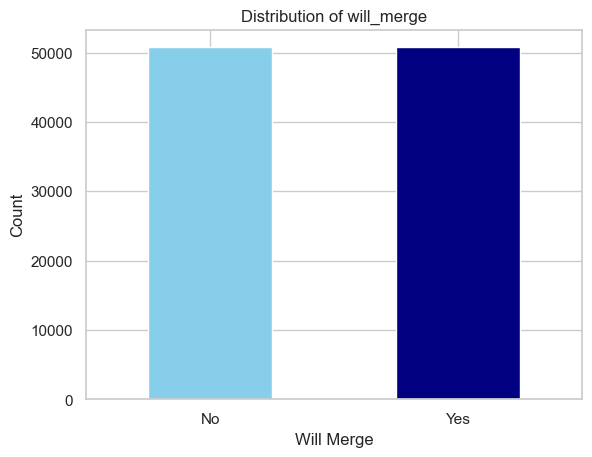

In [50]:
# Check the distribution of will merge
data['will_merge'].value_counts().plot(kind='bar', color=['skyblue', 'navy'])
plt.title('Distribution of will_merge')
plt.xlabel('Will Merge')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

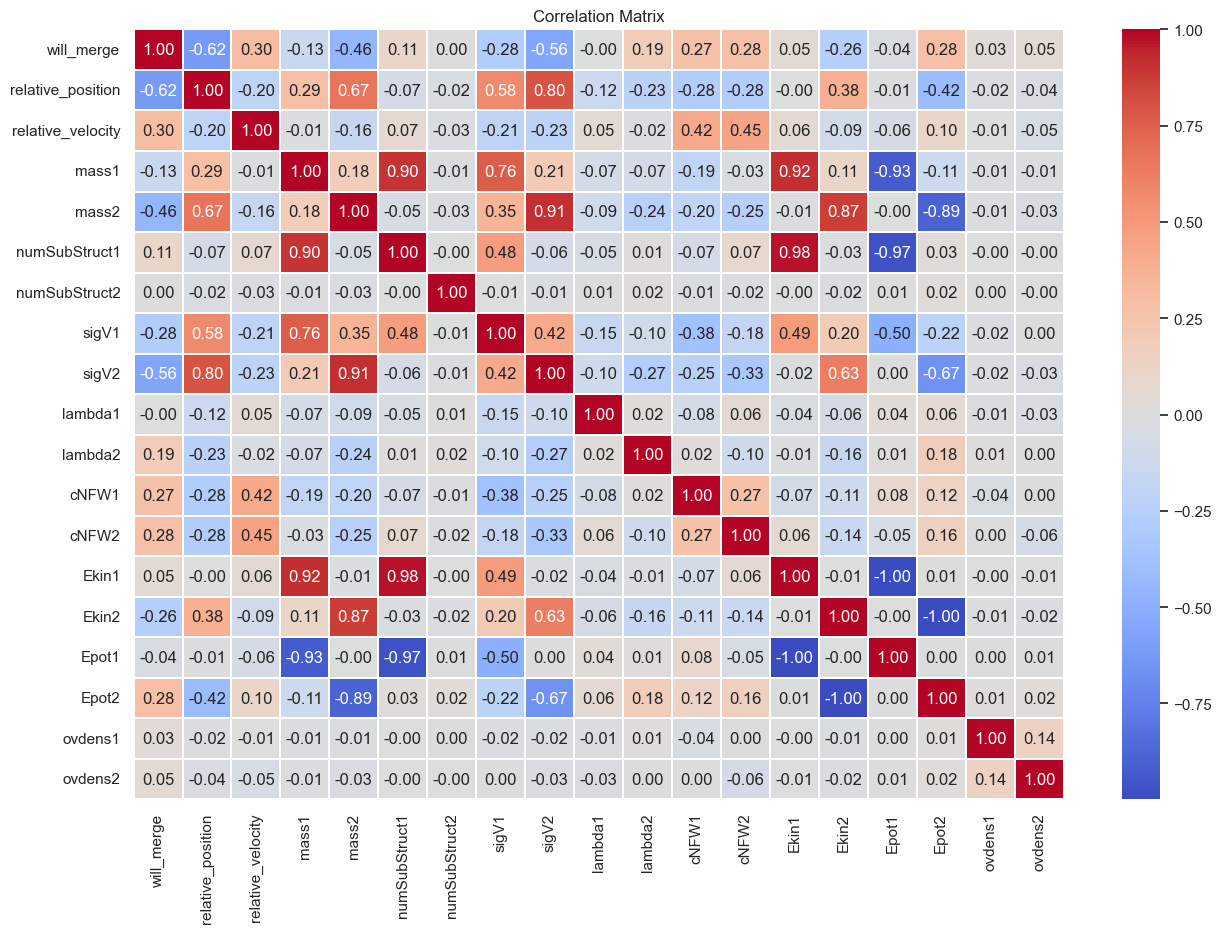

In [51]:
corr_matrix = data.drop(columns='pair').corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.3)
plt.title('Correlation Matrix')
plt.show()

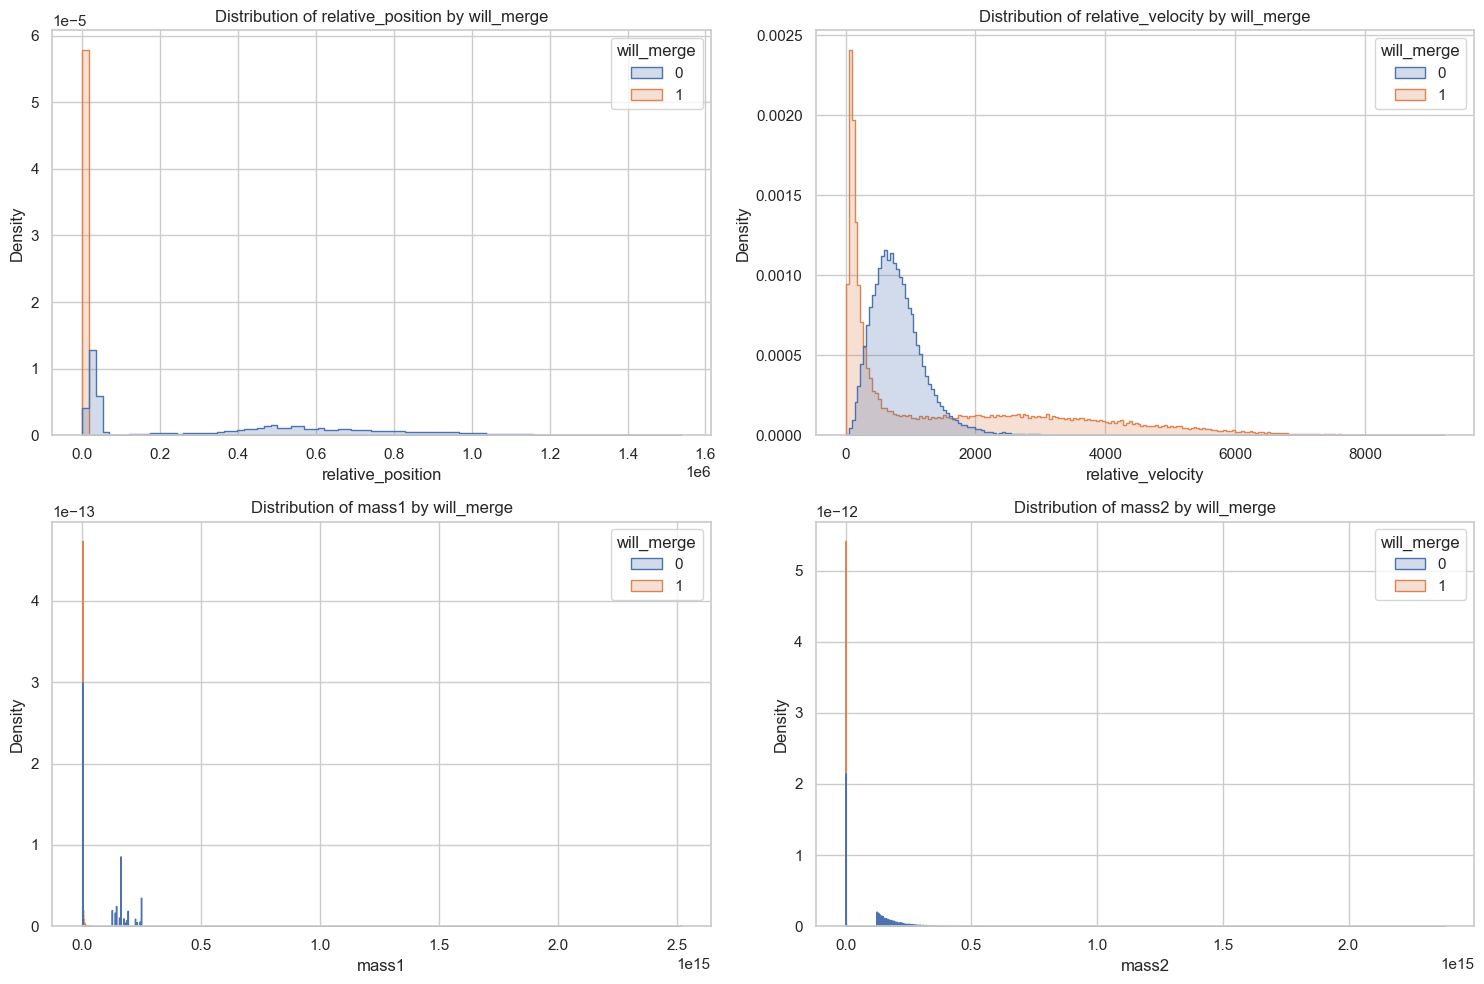

In [57]:
features = ['relative_position', 'relative_velocity', 'mass1', 'mass2']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, feature in zip(axs.flatten(), features):
    sns.histplot(data, x=feature, hue='will_merge', element='step', stat='density', common_norm=False, ax=ax)
    ax.set_title(f'Distribution of {feature} by will_merge')

plt.tight_layout()
plt.show()

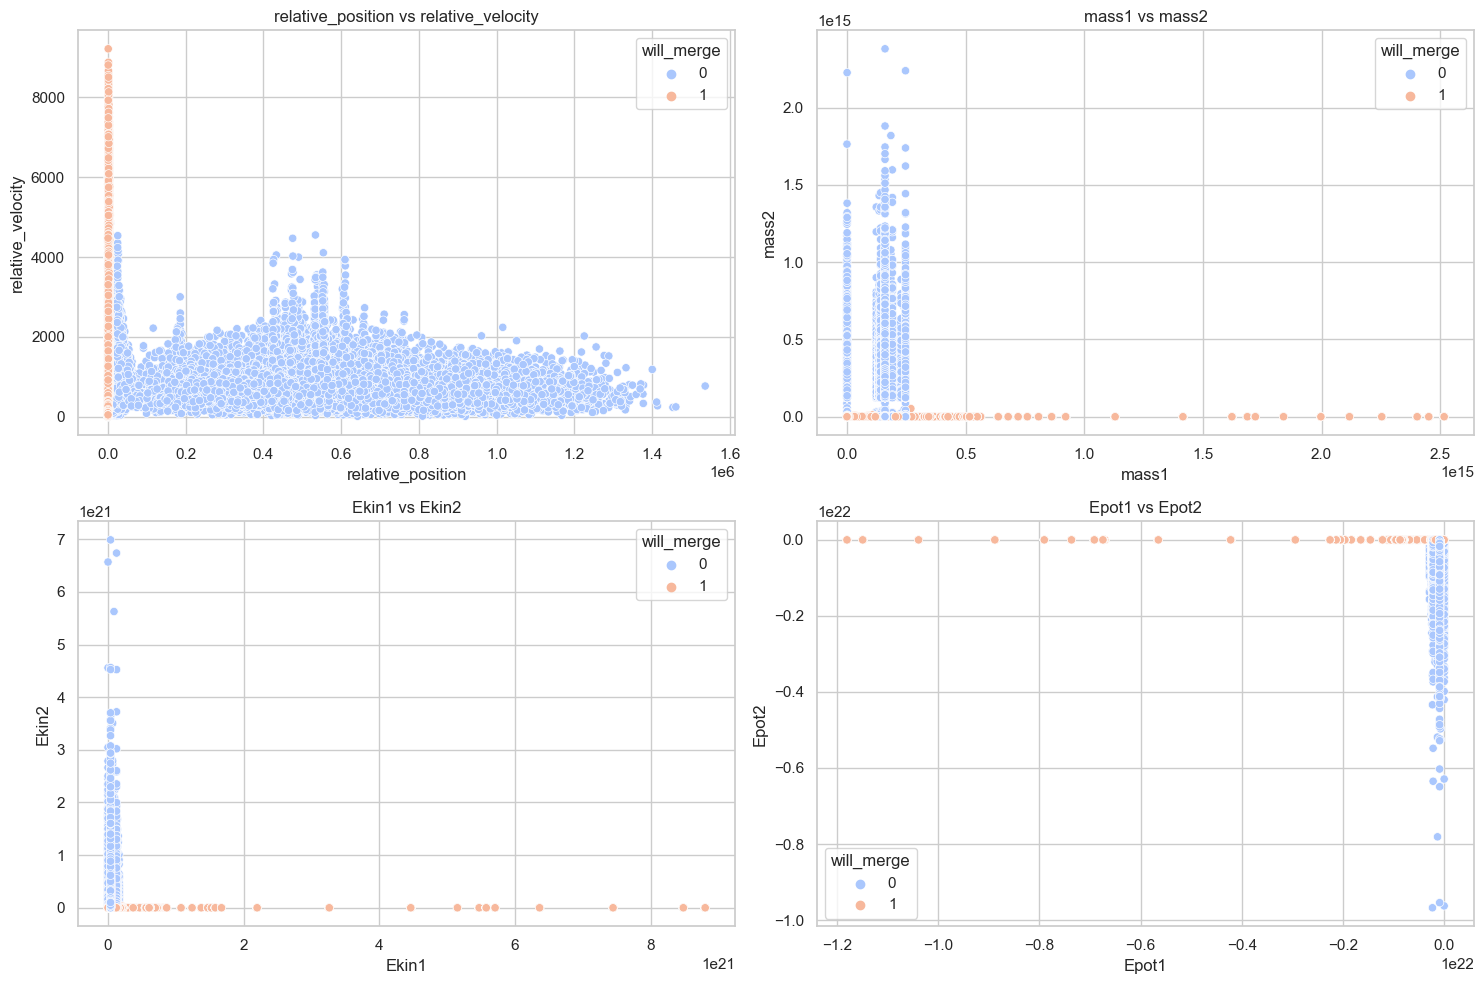

In [58]:
feature_pairs = [('relative_position', 'relative_velocity'), 
                 ('mass1', 'mass2'), 
                 ('Ekin1', 'Ekin2'), 
                 ('Epot1', 'Epot2')]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, (feature1, feature2) in zip(axs.flatten(), feature_pairs):
    sns.scatterplot(data=data, x=feature1, y=feature2, hue='will_merge', palette='coolwarm', ax=ax)
    ax.set_title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()